In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from knn_fish_detector import KNN

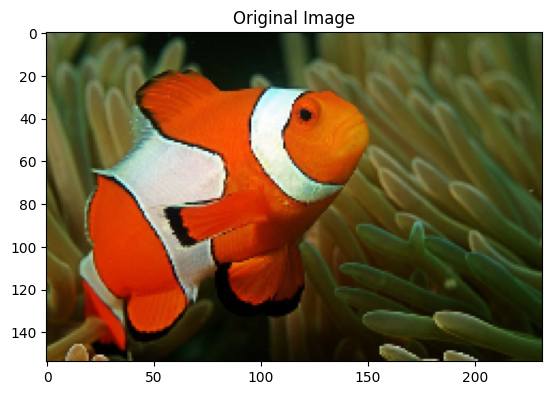

In [2]:
nemo = cv2.imread("input/nemo.png")
nemo = cv2.resize(nemo, (0, 0), None, .25, .25)
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_BGR2HSV)
nemo_rgb = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)

plt.imshow(nemo_rgb)
plt.title("Original Image")
plt.show()

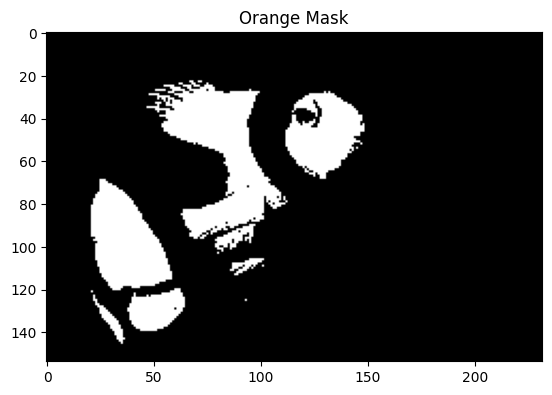

In [8]:
light_orange = np.array([1 , 190, 200])
dark_orange = np.array([18, 255, 255])
orange_mask = cv2.inRange(nemo_hsv, light_orange, dark_orange)

plt.imshow(orange_mask, "gray")
plt.title("Orange Mask")
plt.show()

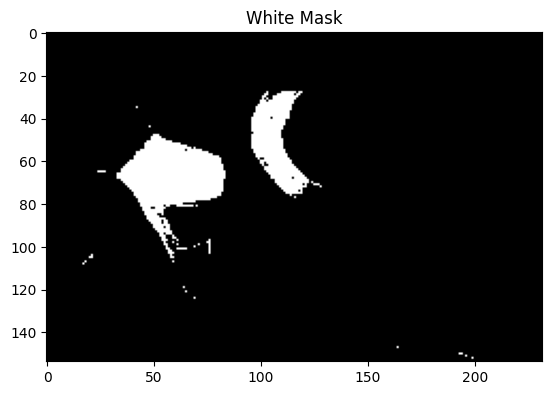

In [4]:
light_white = np.array([0, 0, 190])
dark_white = np.array([145, 60, 255])
white_mask = cv2.inRange(nemo_hsv, light_white, dark_white)

plt.imshow(white_mask, "gray")
plt.title("White Mask")
plt.show()

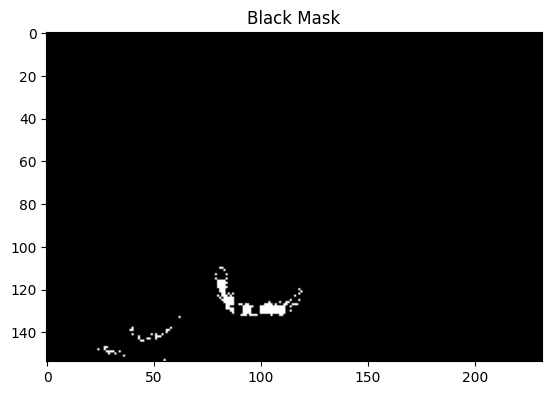

In [5]:
light_black = np.array([0, 0, 0])
dark_black = np.array([255, 250, 5])
black_mask = cv2.inRange(nemo_hsv, light_black, dark_black)

plt.imshow(black_mask, "gray")
plt.title("Black Mask")
plt.show()

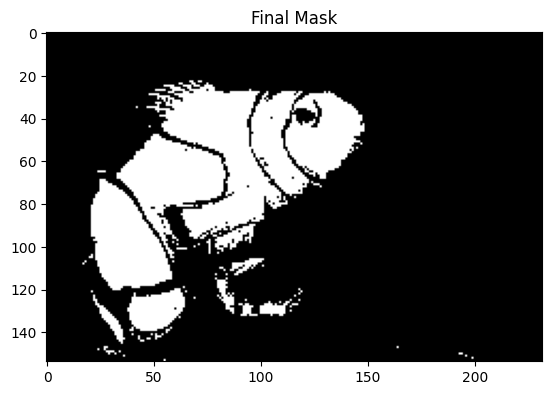

In [6]:
final_mask = orange_mask + white_mask + black_mask
plt.imshow(final_mask, "gray")
plt.title("Final Mask")
plt.show()

In [7]:
X_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1, )

In [9]:
knn = KNN(3)
knn.fit(X_train, y_train)

In [10]:
new_nemo = cv2.imread("input/nemo_test.png")
new_nemo = cv2.resize(new_nemo, (0, 0), None, .1, .1)
new_nemo_hsv = cv2.cvtColor(new_nemo, cv2.COLOR_BGR2HSV)

In [14]:
X_test = new_nemo_hsv.reshape(-1, 3) / 255
y_pred = knn.predict(X_test)

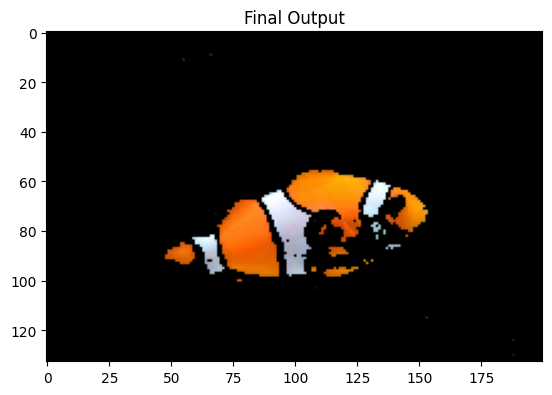

In [13]:
output = np.array(y_pred).reshape(new_nemo.shape[:2])
output = output.astype("uint8")

final_output = cv2.bitwise_and(new_nemo, new_nemo, mask=output)
final_output = cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB)
plt.imshow(final_output)
plt.title("Final Output")
plt.show()